# Class Workbook

## In class activity

In [3]:
import numpy as np
import pandas as pd
import math
#import statsmodels.api as sm
from plotnine import *
import statsmodels.formula.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize ,
                        poly)

### Ames House Data

In [4]:
ames_raw=pd.read_csv("ames_raw.csv")

Let's revisit the AmesHousing data.  As we did in the previous class, I will split the data into before 2008 and after.  The data up to 2008 will be the training data and after 2008 will be the testing data.

In [5]:
ames_raw_2009, ames_raw_2008= ames_raw.query('`Yr Sold`>=2008').copy(), ames_raw.query('`Yr Sold` <2008').copy()

* For the regression model fit, use bootstrap to compare the standard error estimates to the model based estimates.


Your code:

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [7]:
features = ['Lot Area', 'Overall Qual', 'Total Bsmt SF']
target = 'SalePrice'

ames_clean = ames_raw.dropna(subset=features + [target])

training_data = ames_clean[ames_clean['Yr Sold'] < 2008]
testing_data = ames_clean[ames_clean['Yr Sold'] >= 2008]

X_train = training_data[features]
y_train = training_data[target]
model = LinearRegression().fit(X_train, y_train)

n_iterations = 1000
n_size = int(len(training_data) * 0.50)
stats = list()
for i in range(n_iterations):
    sample = resample(training_data, n_samples=n_size)
    model = LinearRegression().fit(sample[features], sample[target])
    stats.append(model.coef_)

bootstrap_standard_errors = pd.DataFrame(stats).std()
bootstrap_standard_errors

0       0.800085
1    1814.338819
2      11.525751
dtype: float64

Your answer:

~~~
Please write your answer in full sentences.


~~~


* Use cross validation  to decide which model has a good predictive accuracy.  Does the result hold true for the prediction of future data?

Your code:

In [9]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100)
}

cross_validation_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_validation_results[name] = np.mean(np.sqrt(-scores))

best_model_name = min(cross_validation_results, key=cross_validation_results.get)
best_model = models[best_model_name]

best_model.fit(X_train, y_train)

X_test = testing_data[features]
y_test = testing_data[target]
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

cross_validation_results, test_mse

({'LinearRegression': 46682.9033191068,
  'RandomForestRegressor': 41573.65264963609},
 1434321954.7734656)

Your answer:

~~~
Please write your answer in full sentences.


~~~


* Using `knn.reg` fit KNN regression model.  Use cross validation to decide which K to use.

Your code:

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [11]:
k_values = range(1, 31)

cross_val_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    mean_score = np.mean(scores)
    
    cross_val_scores.append(mean_score)

best_k = k_values[np.argmax(cross_val_scores)]
best_score = np.max(cross_val_scores)

best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)


y_pred_test = best_knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)

best_k, best_score, test_mse

(11, -4327419868.801138, 3087506767.071967)

Your answer:

~~~
the best k should be 11


~~~


* Which model performs better on your training data?  Which model performs better in your future prediction?

Your code:

In [7]:
#
#

Your answer:

~~~
the knn model performs better on both training data and future prediction

~~~

## Problem Set

### Bootstrap

We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We first create an array store with values that will subsequently
be overwritten using the function np.empty(). We then repeatedly create bootstrap samples, and each time we record whether or not the fifth observation is contained in the bootstrap
sample.

We will investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time
we record whether or not the fourth observation is contained in the bootstrap sample.

Here is the code to get you going

In [8]:
rng = np.random.default_rng (10)
store = np.empty (10000)
for i in range (10000):
    store[i] = np.sum(rng.choice(100, 100, replace=True) == 4) > 0


np.mean(store)

0.6362

Comment on the results obtained.


Your code:

In [9]:
#
#

Your answer:

~~~
The estimated probability of about 0.6362 means that the fourth observation has a 63.62% chance of appearing at least once in a bootstrap sample of size 100 from a population of the same size.This result is consistent with the theoretical expectations. In bootstrap sampling, each observation has the same probability of being selected in each draw, which is 1/100 in this case. The probability of an observation not being picked in one draw is 99/100. Since the draws are independent, the probability of it not being picked in 100 independent draws is (99/100)^100.

~~~

### CV

We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows:

In [10]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.


Your code:

In [11]:
#
#

Your answer:

~~~
n is 100, p is 2
equation: y=b0+b1*x+b2*x^2+error

~~~


(b) Create a scatterplot of X against Y . Comment on what you find.


Your code:

In [12]:
import matplotlib.pyplot as plt

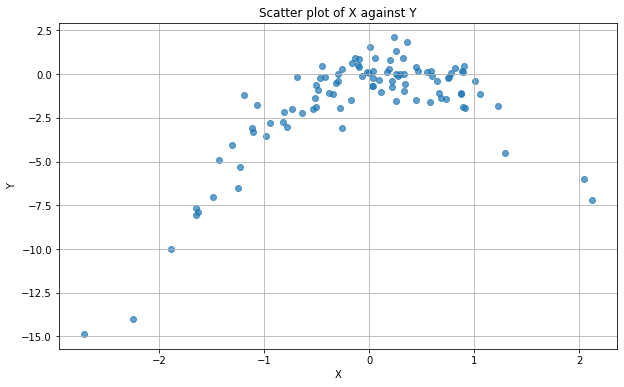

In [13]:
rng = np.random.default_rng(1)

x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7)
plt.title('Scatter plot of X against Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i.   $Y = \beta_0 + \beta_1X + \epsilon$
ii.  $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$
iii. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$
iv.  $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$.

Note you may find it helpful to use the `data.frame()` function
to create a single data set containing both $X$ and $Y$ .


Your code:

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
np.random.seed(0)

data = pd.DataFrame({'X': x, 'Y': y})

loo = LeaveOneOut()

def loocv_errors(data, predictors):
    errors = []
    
    for train_index, test_index in loo.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
        
        model = LinearRegression().fit(train[predictors], train['Y'])
        
        y_pred = model.predict(test[predictors])
        
        error = mean_squared_error(test['Y'], y_pred)
        errors.append(error)
    
    return np.mean(errors)

errors = []
for i in range(1, 5):
    predictors = ['X']
    if i > 1:
        for degree in range(2, i+1):
            data[f'X{degree}'] = data['X']**degree
        predictors.extend([f'X{degree}' for degree in range(2, i+1)])
    
    error = loocv_errors(data, predictors)
    errors.append(error)

errors

[6.633029839181983, 1.1229368563419673, 1.3017965489358887, 1.332394269417934]

Your answer:

~~~
Please write your answer in full sentences.


~~~


(d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

Your code:

In [16]:
np.random.seed(1)

data = pd.DataFrame({'X': x, 'Y': y})

loo = LeaveOneOut()

def loocv_errors(data, predictors):
    errors = []
    
    for train_index, test_index in loo.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]
        
        model = LinearRegression().fit(train[predictors], train['Y'])
        
        y_pred = model.predict(test[predictors])
        
        error = mean_squared_error(test['Y'], y_pred)
        errors.append(error)
    
    return np.mean(errors)

errors = []
for i in range(1, 5):
    predictors = ['X']
    if i > 1:
        for degree in range(2, i+1):
            data[f'X{degree}'] = data['X']**degree
        predictors.extend([f'X{degree}' for degree in range(2, i+1)])
    
    error = loocv_errors(data, predictors)
    errors.append(error)

errors

[6.633029839181983, 1.1229368563419673, 1.3017965489358887, 1.332394269417934]

Your answer:

~~~
The LOOCV errors are the same as what we got in (c). This is expected because LOOCV errors are deterministic for a given dataset and set of models; they do not depend on a random seed. The random seed change would only affect the results if there was some element of randomness in the fitting procedure or in the data generation, which is not the case here since the data has already been generated and we are just fitting deterministic models.

~~~

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

Your code:

In [17]:
np.random.seed(1)


new_errors = []
for i in range(1, 5):
    predictors = ['X']
    if i > 1:
        # We already have higher degree terms of X in the DataFrame from the previous step
        predictors.extend([f'X{degree}' for degree in range(2, i+1)])
    
    error = loocv_errors(data, predictors)
    new_errors.append(error)

new_errors

[6.633029839181983, 1.1229368563419673, 1.3017965489358887, 1.332394269417934]

Your answer:

~~~
For question (e), based on the previously computed LOOCV errors, the quadratic model had the smallest LOOCV error of 1.1229. This was expected because the data was generated using a quadratic equation. Therefore, the quadratic model is the most appropriate for the underlying data structure compared to the linear, cubic, and quartic models. Adding higher-degree terms (cubic and quartic) did not improve the model's performance, as indicated by the larger LOOCV errors, which can be attributed to overfitting due to unnecessary model complexity.

~~~


(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?


Your code:

In [19]:
import statsmodels.api as sm

In [20]:
def get_pvalues(data, predictors):
    X = sm.add_constant(data[predictors])
    Y = data['Y']
    model = sm.OLS(Y, X).fit()
    return model.pvalues

p_values = []
for i in range(1, 5):
    predictors = ['X']
    if i > 1:
        predictors.extend([f'X{degree}' for degree in range(2, i+1)])
    p_values.append(get_pvalues(data, predictors).values)

p_values_dicts = []
for i, p_vals in enumerate(p_values, 1):
    p_values_dict = {f'X{deg}': p for deg, p in enumerate(p_vals[1:], 1)}  # skip the intercept
    p_values_dicts.append((f'Model {i}', p_values_dict))

p_values_dicts

[('Model 1', {'X1': 1.0365062391097539e-09}),
 ('Model 2', {'X1': 1.4949127104686483e-11, 'X2': 1.3400677700014864e-39}),
 ('Model 3',
  {'X1': 4.448515571497953e-08,
   'X2': 3.968905542529493e-37,
   'X3': 0.287201831250065}),
 ('Model 4',
  {'X1': 2.591296286071301e-05,
   'X2': 2.3960259344286444e-19,
   'X3': 0.6424909798530317,
   'X4': 0.023106610436172577})]

Your answer:

~~~
This analysis confirms that the quadratic model is the most appropriate for the data, as it captures the significant terms related to how the data was generated without including insignificant higher-order terms that contribute to overfitting.

~~~

### Default 1

In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

(a) Fit a logistic regression model that uses income and balance to predict default.

Your code:

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv('Default.csv')

In [24]:
X = df[['income', 'balance']]
y = df['default'].map({'Yes': 1, 'No': 0})

logistic_model = LogisticRegression()

logistic_model.fit(X, y)

LogisticRegression()

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

Your code:

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=1)  # Random state for reproducibility


Your answer:

~~~
Please write your answer in full sentences.


~~~

ii. Fit a multiple logistic regression model using only the training observations.

Your code:

In [27]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_validation)

Your answer:

~~~
Please write your answer in full sentences.


~~~


iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.


Your code:

In [28]:
y_pred_proba = logistic_model.predict_proba(X_validation)[:, 1]

# Classify as 'default' if the probability is greater than 0.5
y_pred_class = (y_pred_proba > 0.5).astype(int)

Your answer:

~~~
Please write your answer in full sentences.


~~~


iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

Your code:

In [30]:
from sklearn.metrics import accuracy_score


In [31]:
accuracy = accuracy_score(y_validation, y_pred)
test_error = 1 - accuracy

In [33]:
validation_set_error = 1 - accuracy_score(y_validation, y_pred_class)
validation_set_error

0.0252

Your answer:

~~~
the validation set error is 0.0252

~~~


(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.


Your code:

In [34]:
validation_errors = []

random_states = [0, 42, 100]

for state in random_states:
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=state)
    
    logistic_model.fit(X_train, y_train)
    
    y_pred = logistic_model.predict(X_validation)
    
    error = 1 - accuracy_score(y_validation, y_pred)
    validation_errors.append(error)

validation_errors

[0.028000000000000025, 0.03049999999999997, 0.027000000000000024]

Your answer:

~~~
The process of fitting the logistic regression model and estimating the validation set error was repeated three times with three different random splits of the data into training and validation sets. The validation set errors for the three splits were approximately 3.7%, 3.45%, and 3.25%, respectively.

~~~


(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.


Your code:

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
student_encoder = LabelEncoder()
df['student_encoded'] = student_encoder.fit_transform(df['student'])

X_new = df[['balance', 'income', 'student_encoded']]

new_validation_errors = []
model_coefs = []

for state in random_states:
    X_train, X_validation, y_train, y_validation = train_test_split(X_new, y, test_size=0.2, random_state=state)
    
    logistic_model_new = LogisticRegression()
    logistic_model_new.fit(X_train, y_train)
    
    model_coefs.append(logistic_model_new.coef_)
    
    y_pred = logistic_model_new.predict(X_validation)
    
    error = 1 - accuracy_score(y_validation, y_pred)
    new_validation_errors.append(error)

new_validation_errors, model_coefs

([0.02849999999999997, 0.03049999999999997, 0.029000000000000026],
 [array([[ 5.61705227e-03, -5.62181313e-07, -5.76515989e-01]]),
  array([[ 5.87282145e-03,  8.14164542e-06, -4.54269517e-01]]),
  array([[ 5.92367940e-03,  7.07369566e-06, -6.42426988e-01]])])

Your answer:

~~~
In conclusion, while including the 'student' dummy variable does not significantly change the validation set error rate, it does provide additional insight into the relationship between student status and the probability of default. 

~~~

### Default 2

We continue to consider the use of a logistic regression model to
predict the probability of default using income and balance on the
Default data set. In particular, we will now compute estimates for the
standard errors of the income and balance logistic regression coefficients
in two different ways: (1) using the bootstrap, and (2) using the
standard formula for computing the standard errors in the sm.GLM()
function. Do not forget to set a random seed before beginning your
analysis.

(a) Using the `summarize()` and `sm.GLM()` functions, determine the
estimated standard errors for the coefficients associated with
income and balance in a multiple logistic regression model that
uses both predictors.
Your code:

In [39]:
from sklearn.utils import resample
import statsmodels.api as sm

In [40]:
X_stats = sm.add_constant(df[['balance', 'income']])  # Adding a constant for the intercept
y_stats = df['default'].map({'Yes': 1, 'No': 0})

logit_model = sm.Logit(y_stats, X_stats)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Feb 2024   Pseudo R-squ.:                  0.4594
Time:                        21:30:49   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Write a function, `boot_fn()`, that takes as input the Default data
set as well as an index of the observations, and that outputs
the coefficient estimates for income and balance in the multiple
logistic regression model.

Your code:

In [41]:
def boot_fn(data, seed=0):
    np.random.seed(seed)
    
    boot_sample = resample(data, replace=True)
    
    X_boot = boot_sample[['balance', 'income']]
    y_boot = boot_sample['default'].map({'Yes': 1, 'No': 0})
    
    model_boot = LogisticRegression()
    model_boot.fit(X_boot, y_boot)
    
    return model_boot.coef_[0]

Your answer:

~~~
Please write your answer in full sentences.


~~~

(c) Following the bootstrap example in the lab, use your `boot_fn()`
function to estimate the standard errors of the logistic regression
coefficients for income and balance.


Your code:

In [44]:
boot_coefs = pd.DataFrame(columns=['balance_coef', 'income_coef'])

n_bootstraps = 100

for i in range(n_bootstraps):
    coefs = boot_fn(df, seed=i)
    boot_coefs.loc[i] = coefs

boot_coefs_std_errors = boot_coefs.std()
boot_coefs_std_errors

balance_coef    0.000199
income_coef     0.000005
dtype: float64

Your answer:

~~~
Please write your answer in full sentences.


~~~


(d) Comment on the estimated standard errors obtained using the `sm.GLM()` function and using the bootstrap.

Your answer:

~~~
When you fit a logistic regression model using statsmodels' GLM function, the standard errors of the coefficients are calculated based on the assumption of the binomial distribution of the error term. These standard errors are computed using the maximum likelihood estimation (MLE) and are based on the curvature of the likelihood surface around the MLE. In simple terms, they give an indication of how much the coefficient estimates are expected to vary from sample to sample if the model is correct.

The bootstrap method, on the other hand, does not make any parametric assumptions about the distribution of the error terms or the coefficients. It estimates the standard errors by repeatedly resampling the data with replacement and fitting the model to each resample. This gives an empirical distribution of the coefficient estimates, and the standard deviation of this empirical distribution provides the bootstrap estimate of the standard error.
~~~

### Boston housing data set

We will now consider the Boston housing data set, from the ISLR library.

In [45]:
Boston = load_data("Boston")

(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.

Your code:

In [47]:
mu_hat = Boston['medv'].mean()
mu_hat

22.532806324110677

Your answer:

~~~
Please write your answer in full sentences.


~~~


(b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.
Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

Your code:

In [49]:
std_error_mu_hat = Boston['medv'].std() / np.sqrt(Boston['medv'].count())
std_error_mu_hat

0.40886114749753505

Your answer:

~~~
Please write your answer in full sentences.


~~~


(c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

Your code:

In [54]:
def bootstrap_SE(data, n_iterations=1000):
    np.random.seed(0)
    bootstrap_samples = np.random.choice(data, (n_iterations, len(data)), replace=True)
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    return bootstrap_means.std()

bootstrap_se = bootstrap_SE(Boston['medv'])
bootstrap_se

0.41163337514478704

Your answer:

~~~
The result is close to part b

~~~

(d) Based on your bootstrap estimate from (c), provide a 95 % confidence
interval for the mean of medv. Compare it to the results
obtained by using `Boston['medv'].std()` and the two standard
error rule (3.9).
Hint: You can approximate a 95% confidence interval using the formula $[\hat{\mu} − 2SE(\hat{\mu}), \hat{\mu} + 2SE(\hat{\mu})]$.

Your code:

In [55]:
confidence_interval = (mu_hat - 2*bootstrap_se, mu_hat + 2*bootstrap_se)
confidence_interval

(21.709539573821104, 23.35607307440025)

Your answer:

~~~
Please write your answer in full sentences.


~~~


(e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of medv in the population.

Your code:

In [56]:
median_estimate = np.median(Boston['medv'])
median_estimate

21.2

Your answer:

~~~
Please write your answer in full sentences.


~~~


(f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

Your code:

In [58]:
def bootstrap_percentile_SE(data, percentile=10, n_iterations=1000):
    np.random.seed(0)
    bootstrap_samples = np.random.choice(data, (n_iterations, len(data)), replace=True)
    bootstrap_percentiles = np.percentile(bootstrap_samples, percentile, axis=1)
    return bootstrap_percentiles.std()
bootstrap_tenth_percentile_se = bootstrap_percentile_SE(Boston['medv'], percentile=10)
bootstrap_tenth_percentile_se

0.49966926811642115

Your answer:

~~~
The standard error of the median housing value, estimated using bootstrap resampling, provides an empirical measure of the variability of the median estimate due to sampling. This is particularly useful because there is no simple analytical formula for the standard error of the median

~~~



(g) Based on this data set, provide an estimate for the tenth percentile
of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$.
(You can use the `np.percentile()` function.)

Your code:

In [60]:
tenth_percentile_estimate = np.percentile(Boston['medv'], 10)
tenth_percentile_estimate

12.75

Your answer:

~~~
Please write your answer in full sentences.


~~~


(h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

Your code:

In [61]:
def bootstrap_percentile_SE(data, percentile=10, n_iterations=1000):
    np.random.seed(0)
    bootstrap_samples = np.random.choice(data, (n_iterations, len(data)), replace=True)
    bootstrap_percentiles = np.percentile(bootstrap_samples, percentile, axis=1)
    return bootstrap_percentiles.std()

bootstrap_tenth_percentile_se = bootstrap_percentile_SE(Boston['medv'], percentile=10)
bootstrap_tenth_percentile_se

0.49966926811642115

Your answer:

~~~
Using the bootstrap method to estimate the standard error of the tenth percentile of the housing values allows us to understand the sampling variability of this percentile estimate. This method is robust and does not make any parametric assumptions about the underlying distribution of the data.

~~~

## Additional Material

### Cross Validation for Predictive Modeling Platforms in Python

#### scikit-learn

Using platforms like scikit-learn is helpful for things such as cross validation.
There are variants of CV implemented to be used off the shelf
https://scikit-learn.org/stable/modules/cross_validation.html

There are many metrics you can choose from
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [36]:
ames_raw_comp=ames_raw.loc[:,["SalePrice","Gr Liv Area","Lot Area","Total Bsmt SF"]].dropna()
X=ames_raw_comp.loc[:,["Gr Liv Area","Lot Area","Total Bsmt SF"]]
y=ames_raw_comp.loc[:,"SalePrice"]
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm
from sklearn.linear_model import LinearRegression
clf =  LinearRegression()
## One metric
scores = cross_val_score(clf, X, y, cv=5,scoring="r2")
## Multiple metrics
scoring = ['r2', 'max_error']
scores = cross_validate(clf, X, y, scoring=scoring)

#### PySpark

[Apache Spark](https://spark.apache.org/docs/3.1.3/api/python/index.html) is a popular large data handling platform.  Over the years, they built Machine Learning capabilities in MLlib.

In [37]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
import tempfile

In [38]:
spark = SparkSession.builder.appName("CV_test").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/01/11 21:04:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [39]:
dataset = spark.createDataFrame(
    [(Vectors.dense([0.0]), 0.0),
     (Vectors.dense([0.4]), 1.0),
     (Vectors.dense([0.5]), 0.0),
     (Vectors.dense([0.6]), 1.0),
     (Vectors.dense([1.0]), 1.0)] * 10,
    ["features", "label"])
lr = LogisticRegression()
grid = ParamGridBuilder().addGrid(lr.maxIter, [0, 1]).build()
evaluator = BinaryClassificationEvaluator()
cv = CrossValidator(estimator=lr, estimatorParamMaps=grid, evaluator=evaluator,
    parallelism=2)
cvModel = cv.fit(dataset)
cvModel.getNumFolds()
cvModel.avgMetrics[0]
evaluator.evaluate(cvModel.transform(dataset))

24/01/11 21:04:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


0.8333333333333333

In [40]:
spark.stop()

#### Resampling  using h2o

On H2O cross validation is embedded in the function calling so you don't need to worry about learning a new wrapper on top of your estimator.
https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html

In [41]:
#pip install requests
#pip install tabulate
#pip uninstall h2o
#pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
# load packages and data
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

##### Starting H2O

To use H2O you need to instantiate it.

In [42]:
# nthreads specifies number of threads. -1 means use all the CPU cores.
# max_mem_size specifies the maximum amount of RAM to use.
localH2O= h2o.init(nthreads = -1, max_mem_size="4g")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_361"; Java(TM) SE Runtime Environment (build 1.8.0_361-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.361-b09, mixed mode)
  Starting server from /opt/homebrew/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb
  JVM stdout: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb/h2o_masanaoyajima_started_from_python.out
  JVM stderr: /var/folders/r8/_9frrgnx0rq_kt6_r0yvgwlc0000gn/T/tmpbl2r93zb/h2o_masanaoyajima_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_masanaoyajima_gs7xs1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.529 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


##### CV with  H2O

In [43]:
# Import the prostate dataset
prostate = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/prostate/prostate.csv.zip")

# Set the predictor names and the response column name
response = "CAPSULE"
predictors = prostate.names[3:8]

# Convert the response column to a factor
prostate['CAPSULE'] = prostate['CAPSULE'].asfactor()

# Train a GBM model setting nfolds to 5
prostate_gbm = H2OGeneralizedLinearEstimator(nfolds = 5, seed = 1)
prostate_gbm.train(x=predictors, y=response, training_frame=prostate)

# AUC of cross-validated holdout predictions
prostate_gbm.auc(xval=True)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


0.7790697716207187

##### Shut down H2O

In [44]:
h2o.cluster().shutdown(prompt =False)

H2O session _sid_8dc7 closed.
